In [43]:
import pandas as pd
import numpy as np
import seaborn as sns

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling, over_sampling

In [21]:
df = pd.read_csv('data/training.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [61]:
# list with columns to be removed
drop_lst = ['BatchId', 'CurrencyCode', 'CountryCode', 'ProductCategory', 'Value']
# list with columns to transform datatype string to category 
cat_lst = ['ProviderId', 'ProductId', 'ChannelId', 'PricingStrategy', 'FraudResult']
# list with columns to make dummies
dummy_lst = ['ProviderId', 'ProductId', 'ChannelId', 'PricingStrategy']
# list with columns to transform datatype string to datetime 
datetime_lst = ['TransactionStartTime']
# identiofy target variable
target = 'FraudResult'

In [23]:
def remove_columns(df, drop_lst):
    remaining_features = [x for x in df.columns if x not in drop_lst]
    df = df[remaining_features]
    return df

In [24]:
def make_categories(df, cat_lst):
    for i in cat_lst:
        df[i]=df[i].astype('category')
    return df

In [25]:
def make_dummies(df, dummy_lst):
    for i in dummy_lst:
        if str(df[i][1]).isnumeric():
            dummies = pd.get_dummies(df[i], prefix=str(i), drop_first=True)
        else:
            dummies = pd.get_dummies(df[i], drop_first=True)
        df = df.drop([i], axis=1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [26]:
def transform_to_datetime(df, datetime_lst):
    df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
    return df

In [27]:
def make_split(df, target, test_size=0.30, random_state=101):
    X_train,X_test,y_train,y_test=train_test_split(df.drop(target,axis=1),df[target],test_size=test_size,random_state=random_state)
    return X_train,X_test,y_train,y_test

In [111]:
def balance_traindata(X_train, y_train, target):
    '''
    requires 3 parameters: X_train, y_train, target
    returns: X_train, y_train
    '''
    # Oversample data
    smote_algo = SMOTE(random_state=0)
    smote_data_X, smote_data_Y = smote_algo.fit_resample(X_train, y_train)
    smote_data_X = pd.DataFrame(data=smote_data_X, columns=X_train.columns)
    smote_data_Y = pd.DataFrame(data=smote_data_Y)
    # Join X and Y smote data into one
    smote_data = smote_data_X
    smote_data[target] = smote_data_Y[target]
    return smote_data, smote_data[target]

In [28]:
df = pd.read_csv('data/training.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [29]:
df = remove_columns(df, drop_lst)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   AccountId             95662 non-null  object 
 2   SubscriptionId        95662 non-null  object 
 3   CustomerId            95662 non-null  object 
 4   ProviderId            95662 non-null  object 
 5   ProductId             95662 non-null  object 
 6   ChannelId             95662 non-null  object 
 7   Amount                95662 non-null  float64
 8   TransactionStartTime  95662 non-null  object 
 9   PricingStrategy       95662 non-null  int64  
 10  FraudResult           95662 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 8.0+ MB


In [30]:
df = make_categories(df, cat_lst)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   TransactionId         95662 non-null  object  
 1   AccountId             95662 non-null  object  
 2   SubscriptionId        95662 non-null  object  
 3   CustomerId            95662 non-null  object  
 4   ProviderId            95662 non-null  category
 5   ProductId             95662 non-null  category
 6   ChannelId             95662 non-null  category
 7   Amount                95662 non-null  float64 
 8   TransactionStartTime  95662 non-null  object  
 9   PricingStrategy       95662 non-null  category
 10  FraudResult           95662 non-null  category
dtypes: category(5), float64(1), object(5)
memory usage: 4.8+ MB


In [31]:
df = make_dummies(df, dummy_lst)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   TransactionId         95662 non-null  object  
 1   AccountId             95662 non-null  object  
 2   SubscriptionId        95662 non-null  object  
 3   CustomerId            95662 non-null  object  
 4   Amount                95662 non-null  float64 
 5   TransactionStartTime  95662 non-null  object  
 6   FraudResult           95662 non-null  category
 7   ProviderId_2          95662 non-null  uint8   
 8   ProviderId_3          95662 non-null  uint8   
 9   ProviderId_4          95662 non-null  uint8   
 10  ProviderId_5          95662 non-null  uint8   
 11  ProviderId_6          95662 non-null  uint8   
 12  ProductId_10          95662 non-null  uint8   
 13  ProductId_11          95662 non-null  uint8   
 14  ProductId_12          95662 non-null  uint8   
 15  Pr

In [32]:
df = transform_to_datetime(df, datetime_lst)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   AccountId             95662 non-null  object             
 2   SubscriptionId        95662 non-null  object             
 3   CustomerId            95662 non-null  object             
 4   Amount                95662 non-null  float64            
 5   TransactionStartTime  95662 non-null  datetime64[ns, UTC]
 6   FraudResult           95662 non-null  category           
 7   ProviderId_2          95662 non-null  uint8              
 8   ProviderId_3          95662 non-null  uint8              
 9   ProviderId_4          95662 non-null  uint8              
 10  ProviderId_5          95662 non-null  uint8              
 11  ProviderId_6          95662 non-null  uint8              
 12  Prod

In [34]:
ignore_lst = ['TransactionId', 'AccountId', 'SubscriptionId', 'CustomerId', 'TransactionStartTime']
df = remove_columns(df, ignore_lst)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Amount             95662 non-null  float64 
 1   FraudResult        95662 non-null  category
 2   ProviderId_2       95662 non-null  uint8   
 3   ProviderId_3       95662 non-null  uint8   
 4   ProviderId_4       95662 non-null  uint8   
 5   ProviderId_5       95662 non-null  uint8   
 6   ProviderId_6       95662 non-null  uint8   
 7   ProductId_10       95662 non-null  uint8   
 8   ProductId_11       95662 non-null  uint8   
 9   ProductId_12       95662 non-null  uint8   
 10  ProductId_13       95662 non-null  uint8   
 11  ProductId_14       95662 non-null  uint8   
 12  ProductId_15       95662 non-null  uint8   
 13  ProductId_16       95662 non-null  uint8   
 14  ProductId_19       95662 non-null  uint8   
 15  ProductId_2        95662 non-null  uint8   
 16  Prod

In [40]:
#X_train,X_test,y_train,y_test=make_split(df, target)

In [117]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('FraudResult',axis=1),df['FraudResult'],test_size=0.30, random_state=101)

In [118]:
print('Rows in X_train = ' + str(len(X_train)))
print('Rows in y_train = ' + str(len(y_train)))
print('Count of "0" in y_train = ' + str(y_train.value_counts()[0]))
print('Count of "1" in y_train = ' + str(y_train.value_counts()[1]))
#print('Rows in X_test = ' + str(len(X_test)))
#print('Rows in y_test = ' + str(len(y_test)))

Rows in X_train = 66963
Rows in y_train = 66963
Count of "0" in y_train = 66819
Count of "1" in y_train = 144


In [119]:
X_train, y_train = balance_traindata(X_train, y_train, target)

In [120]:
print('Rows in X_train = ' + str(len(X_train)))
print('Rows in y_train = ' + str(len(y_train)))
print('Count of "0" in y_train = ' + str(y_train.value_counts()[0]))
print('Count of "1" in y_train = ' + str(y_train.value_counts()[1]))
#print('Rows in X_test = ' + str(len(X_test)))
#print('Rows in y_test = ' + str(len(y_test)))

Rows in X_train = 133638
Rows in y_train = 133638
Count of "0" in y_train = 66819
Count of "1" in y_train = 66819


In [104]:
# count number of '1' in y_test
smote_data_Y.value_counts()[1]

66819

In [75]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[[-2.88860176e-08 -4.75424647e-14 -6.83018795e-12 -9.07011014e-11
  -3.44874645e-11 -8.10857972e-11 -3.66993601e-11 -3.28039685e-12
  -3.39591713e-15 -6.89208677e-13 -1.84052815e-12 -2.79215618e-11
  -2.71669692e-14 -2.29554305e-12 -5.80674318e-13 -5.46354306e-13
  -3.53144947e-12 -2.78384935e-13  0.00000000e+00 -3.87114322e-13
  -7.13069030e-14 -5.76188796e-11 -5.68804118e-12 -4.06812709e-14
  -7.72952521e-11 -1.86643964e-13 -4.99135140e-13 -2.37184160e-14
  -8.81167019e-11 -1.34505536e-10 -2.58439952e-12 -4.20374516e-12
  -1.88932359e-10 -3.25476393e-11]]
[-2.26411938e-10]


In [30]:
# Let’s see how the model performs against data that it hasn’t been trained on.
y_pred = lr.predict(X_test)

In [31]:
# Given that this is a classification problem, we use a confusion matrix to evaluate our model.
confusion_matrix(y_test, y_pred)

array([[17178, 11472],
       [   48,     1]])

In [16]:
# LogReg
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
predictions=logmodel.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
accuracy*100

59.85922854454859

In [22]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

y_train_predicted = cross_val_predict(logmodel, X_train, y_train, cv=5)

actual =    y_train 
predicted = y_train_predicted
results = confusion_matrix(actual, predicted)

In [23]:
results

array([[45494, 21325],
       [  133,    11]])

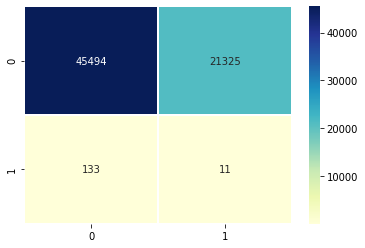

In [26]:
cm = confusion_matrix(actual, predicted)
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);

In [68]:
mythreshold = 0.4992

decisions = (lr.predict_proba(X_test)[:,1] >= mythreshold).astype(int)
confusion_matrix(y_test, decisions)

array([[  147, 28503],
       [   47,     2]])